Output()

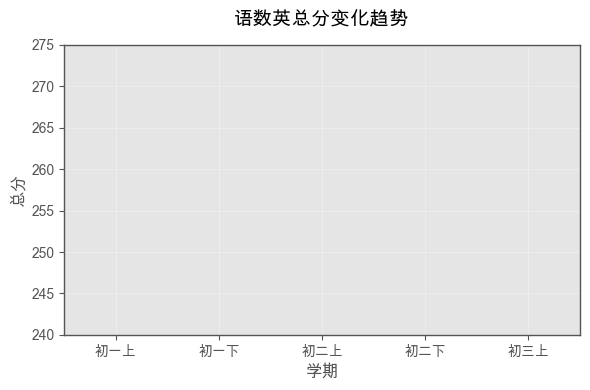

In [ ]:
# 如果尚未安装依赖，请取消以下注释并运行
# !pip install numpy matplotlib ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

# —————— 全局美化设置 ——————
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# —————— 数据与状态 ——————
x_data = [0, 1, 2, 3]              # 初一上, 初一下, 初二上, 初二下
y_data = [250, 255, 260, 265]
labels = ['初一上', '初一下', '初二上', '初二下', '初三上']

next_index = 0
shown_x = []
shown_y = []

# —————— 创建画布并固定坐标轴 ——————
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("语数英总分变化趋势", pad=15)
ax.set_xlabel("学期")
ax.set_ylabel("总分")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.grid(True, alpha=0.3)

# 固定坐标轴范围：x 从 -0.5 到 4.5，y 在数据范围稍作扩展
ax.set_xlim(-0.5, len(labels)-0.5)
y_min, y_max = min(y_data), max(y_data)
ax.set_ylim(y_min - 10, y_max + 10)

plt.tight_layout()

# —————— 按钮回调 ——————
def on_next_clicked(_):
    global next_index
    if next_index < len(x_data):
        xi, yi = x_data[next_index], y_data[next_index]
        shown_x.append(xi); shown_y.append(yi)
        ax.scatter(xi, yi, s=80, color='#4C72B0', edgecolor='white', zorder=3)
        ax.text(xi, yi + 1.5, str(yi), ha='center', va='bottom', fontsize=11)
        next_index += 1

    elif next_index == len(x_data):
        # 用前 4 个点拟合直线，计算预测 y
        coeffs = np.polyfit(shown_x, shown_y, deg=1)
        y_pred = np.poly1d(coeffs)(len(labels)-1)
        # 在预测位置画问号
        ax.text(len(labels)-1, y_pred, "?", fontsize=24, color='#C44E52',
                ha='center', va='center', weight='bold')
        next_index += 1

    with output:
        clear_output(wait=True)
        display(fig)

def on_fit_clicked(_):
    # 只有在问号也显示后才绘制拟合直线
    if next_index >= len(x_data) + 1:
        coeffs = np.polyfit(shown_x, shown_y, deg=1)
        poly = np.poly1d(coeffs)
        x_fit = np.array(shown_x + [len(labels)-1])
        y_fit = poly(x_fit)

        ax.plot(x_fit, y_fit, linestyle='--', linewidth=2, label='拟合直线', zorder=2)
        ax.scatter(x_fit[-1], y_fit[-1], s=100, color='#DD8452', edgecolor='white', zorder=4)
        ax.text(x_fit[-1], y_fit[-1] + 1.5, f"{y_fit[-1]:.1f}",
                ha='center', va='bottom', fontsize=11, color='#DD8452')
        ax.legend(frameon=False, fontsize=11, loc='upper left')

        with output:
            clear_output(wait=True)
            display(fig)

# —————— 创建按钮并设置样式 ——————
btn_next = widgets.Button(
    description="显示下一个数据点",
    style={'button_color': '#4C72B0', 'font_weight': 'bold'},
    layout=widgets.Layout(width='180px', height='40px', margin='0 10px 0 0')
)
btn_fit = widgets.Button(
    description="显示拟合直线",
    style={'button_color': '#55A868', 'font_weight': 'bold'},
    layout=widgets.Layout(width='180px', height='40px')
)
btn_next.on_click(on_next_clicked)
btn_fit.on_click(on_fit_clicked)

# —————— 布局与展示 ——————
output = widgets.Output()
controls = widgets.HBox([btn_next, btn_fit], layout=widgets.Layout(margin='10px 0'))

display(controls, output)
with output:
    display(fig)


Output()

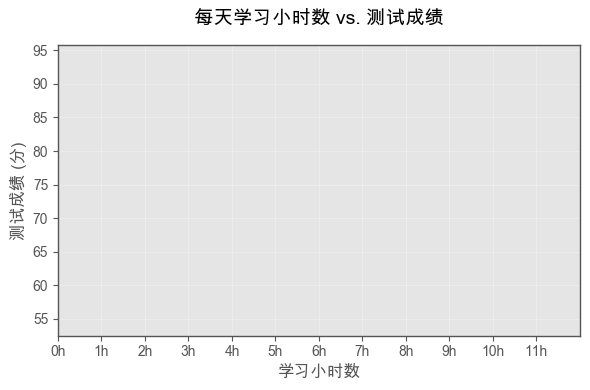

In [15]:
# 如果尚未安装依赖，请取消以下注释并运行
# !pip install numpy matplotlib ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

# —————— 全局美化设置 ——————
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# —————— 数据与状态 ——————
np.random.seed(0)
x_data = np.arange(1, 11)  # 学习小时数：1 到 10 小时
# 成绩 = 50 + 4 * hours + 噪声（标准差2分）
y_data = 50 + 4 * x_data + np.random.normal(scale=2.0, size=10)
labels = [f"{h}小时" for h in x_data] + ["11小时"]

next_index = 0
shown_x = []
shown_y = []

# —————— 创建画布并固定坐标轴 ——————
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("每天学习小时数 vs. 测试成绩", pad=15)
ax.set_xlabel("学习小时数")
ax.set_ylabel("测试成绩 (分)")
ax.set_xticks(range(0, 12))
ax.set_xticklabels([f"{i}h" for i in range(0, 12)])
ax.grid(True, alpha=0.3)

# 固定坐标轴范围：x轴 0–12 小时，y 轴在分数范围稍作扩展
ax.set_xlim(0, 12)
y_min, y_max = y_data.min(), y_data.max()
ax.set_ylim(y_min - 5, y_max + 5)
plt.tight_layout()

# —————— 按钮回调 ——————
def on_next_clicked(_):
    global next_index
    if next_index < len(x_data):
        xi, yi = x_data[next_index], y_data[next_index]
        shown_x.append(xi); shown_y.append(yi)
        ax.scatter(xi, yi, s=80, color='#4C72B0', edgecolor='white', zorder=3)
        ax.text(xi, yi + 1, f"{yi:.1f}", ha='center', va='bottom', fontsize=10)
        next_index += 1

    elif next_index == len(x_data):
        # 用前 10 个点线性拟合，计算预测第 11 小时的成绩
        coeffs = np.polyfit(shown_x, shown_y, deg=1)
        y_pred = np.poly1d(coeffs)(11)
        ax.text(11, y_pred, "?", fontsize=24, color='#C44E52',
                ha='center', va='center', weight='bold')
        next_index += 1

    with output:
        clear_output(wait=True)
        display(fig)

def on_fit_clicked(_):
    if next_index >= len(x_data) + 1:
        coeffs = np.polyfit(shown_x, shown_y, deg=1)
        poly = np.poly1d(coeffs)
        x_fit = np.array(shown_x + [11])
        y_fit = poly(x_fit)

        ax.plot(x_fit, y_fit, linestyle='--', linewidth=2, label='拟合直线', zorder=2)
        ax.scatter(x_fit[-1], y_fit[-1], s=100, color='#DD8452', edgecolor='white', zorder=4)
        ax.text(x_fit[-1], y_fit[-1] + 1, f"{y_fit[-1]:.1f}分",
                ha='center', va='bottom', fontsize=10, color='#DD8452')
        ax.legend(frameon=False, fontsize=11, loc='upper left')

        with output:
            clear_output(wait=True)
            display(fig)

# —————— 创建按钮并设置样式 ——————
btn_next = widgets.Button(
    description="显示下一个学习点",
    style={'button_color': '#4C72B0', 'font_weight': 'bold'},
    layout=widgets.Layout(width='180px', height='40px', margin='0 10px 0 0')
)
btn_fit = widgets.Button(
    description="显示拟合直线",
    style={'button_color': '#55A868', 'font_weight': 'bold'},
    layout=widgets.Layout(width='180px', height='40px')
)
btn_next.on_click(on_next_clicked)
btn_fit.on_click(on_fit_clicked)

# —————— 布局与展示 ——————
output = widgets.Output()
controls = widgets.HBox([btn_next, btn_fit], layout=widgets.Layout(margin='10px 0'))

display(controls, output)
with output:
    display(fig)
